# 报告
## 一、爬虫部分（以Chrome版为例）
### （一）代码思路
（1）调用selenium库中的webdriver包，访问网站，获取网页源代码；

（2）使用BeautifulSoup包和正则表达式对源代码字符串进行处理；

（3）将处理后的字符串转换为Dataframe对象，利用pandas库将其写入.csv文件

In [5]:
from bs4 import BeautifulSoup
import re 
import urllib
import pandas as pd
import time
import random
from selenium import webdriver

def main():
     baseurl = "https://www.che168.com/beijing/list/"
     datalist = getData(baseurl)
     saveData(datalist,"car_message.csv")

def getData(baseurl):

    Findcardname = re.compile(r'<h4 class="card-name">(.*?)</h4>',re.S)
    Findcardsunit = re.compile(r'<p class="cards-unit">(.*?)</p>',re.S)
    Findpirce = re.compile(r'<em>(.*?)</em>',re.S)
    FindFpirce = re.compile(r'<s>(.*?)万</s>',re.S)

    count = 0
    datalist = []
    driver = webdriver.Chrome()
    for i in range(1,101):#共100页
        time.sleep(Random())
        url = f"{baseurl}a0_0msdgscncgpi1ltocsp2exx0{i}exx0/?pvareaid=102179#currengpostion"#实现翻页操作
        html = askURL(driver,url)
        #获取网页源代码
        soup = BeautifulSoup(html,"html.parser")
        #使用"hyml.parser"解析器解析储存网页源代码的字符串
        count += 1
        for item in soup.find_all('div',class_="cards-bottom"):
            #查找<div>标签，其必须具有一个名为"cards-bottom"的属性；返回具有该属性的beautifulsoup对象
            #time.sleep(Random())
            data = []
            item = str(item)
            #将item从Beautifulsoup类型转换为str类型

            cardname = re.findall(Findcardname,item)
            if cardname:
                cardname = re.findall(Findcardname,item)[0].strip()
                #在返回的列表中取第一个元素，并使用strip()函数去除其两侧的空白字符
                if "<i class=\"tp-tags cxc-tip\"></i>" in cardname:
                    Cardname = cardname.replace("<i class=\"tp-tags cxc-tip\"></i>","")                     #将可能出现的"<i class=\"tp-tags cxc-tip\"></i>"剔除
                else:
                    Cardname = cardname.replace("\n","")
                data.append(Cardname)
            else:
                data.append("N/A")
            #寻找汽车名称信息

            cardsunit = re.findall(Findcardsunit,item)
            if cardsunit:
                cardsunit = re.findall(Findcardsunit,item)[0].strip()
                Cardsunit = cardsunit.replace("\n","")
                miles = re.findall(r'(.*?)万公里',Cardsunit)
                dates = re.findall(r'／(.*?)／北京',Cardsunit)
                data.append(miles[0] if miles else "N/A")
                data.append(dates[0] if dates else "N/A")
            else:
                data.append("N/A")              

            pirce = re.findall(Findpirce,item)
            if pirce:
                pirce = re.findall(Findpirce,item)[0].strip()
                Pirce = pirce.replace("\n","")
                data.append(Pirce)
            else:
                data.append("N/A")

            Fpirce = re.findall(FindFpirce,item)
            if Fpirce:
                Fpirce = re.findall(FindFpirce,item)[0].strip()
                data.append(Fpirce)
            else:
                data.append("N/A")
            datalist.append(data)
    print("总执行页数为：",count)
    return datalist

def Random():
    random_number = random.uniform(1.0, 1.5)
    return random_number

#打开目标网页，获取网页源代码，存入html并返回
def askURL(driver,url):
    driver.get(url)
    html = driver.page_source
    return html


def saveData(datalist, savepath):
    col = ["汽车型号", "公里数", "上牌日期", "报价", "新车含税价"]
    df = pd.DataFrame(datalist, columns=col)
    df.to_csv(savepath, index=False, encoding="utf-8-sig")

if __name__ == "__main__":
    main()

总执行页数为： 100


### （二）代码解读
#### （1）获取网页源代码

In [6]:
from selenium import webdriver

baseurl = "https://www.che168.com/beijing/list/"#该语句位于 def main() 函数中
driver = webdriver.Chrome()#为减少浏览器打开次数，此语句位于 def getData() 函数中

def askURL(driver,url):
    driver.get(url)
    html = driver.page_source
    return html#将获取的网页源代码以字符串形式返回


print(type(askURL(driver,baseurl)))


<class 'str'>


#### （2）解析网页源代码

1. 创建标准正则表达式

2. 调用两层for循环：第一层为 "for i in range(1,101)" ，获取每一页的源代码；第二层为 "for item in soup.find_all('div',class_="cards-bottom"),查找符合条件的BeautifulSoup对象，并进行字符串处理，将结果储存在列表中

3. 第一层for循环的重点在于实现“翻页”操作。此外还使用随机time.sleep()应对网站反爬机制；循环每执行一次是一页

4. 在第二层for循环中，对于每个标准正则表达式对应的对象，用一层if else判断该对象是否为空，如果为空则赋“N/A";循环每执行一次是一辆车


##### 创建标准正则表达式

In [ ]:

import re 

Findcardname = re.compile(r'<h4 class="card-name">(.*?)</h4>',re.S)
Findcardsunit = re.compile(r'<p class="cards-unit">(.*?)</p>',re.S)
Findpirce = re.compile(r'<em>(.*?)</em>',re.S)
FindFpirce = re.compile(r'<s>(.*?)万</s>',re.S)
#创建四个标准正则表达式，分别对应列索引：“汽车型号”，“公里数+上牌日期”，“报价”，“新车含税价”

##### 随机化的 time.sleep()

In [ ]:
import time
import random

def Random():
    random_number = random.uniform(1.0,1.5)
    return random_number

time.sleep(Random())#第一层for循环中的调用

##### 实现“翻页”操作，获取每页的源代码

In [ ]:
from bs4 import BeautifulSoup
from selenium import webdriver


for i in range(1,101):

    baseurl = "https://www.che168.com/beijing/list/"#此语句位于main()函数

    time.sleep(Random())
    url = f"{baseurl}a0_0msdgscncgpi1ltocsp2exx0{i}exx0/?pvareaid=102179#currengpostion"#实现翻页操作
    html = askURL(driver,url)
    soup = BeautifulSoup(html,"html.parser")

##### 第二层for循环，查找符合条件的Beautifulsoup类型

In [ ]:

for item in soup.find_all('div',class_="cards-bottom"):
#查找<div>标签，其必须具有一个名为"cards-bottom"的属性；返回具有该属性的beautifulsoup对象
    data = []
    item = str(item)##将item从Beautifulsoup类型转换为str类型

##### 在第二层for循环内部寻找车辆名称信息

观察网页源代码可知，部分"card-name"包含干扰字符串"<i class=\"tp-tags cxc-tip\"></i>"，需要调用replace()将其置空

In [ ]:
cardname = re.findall(Findcardname,item)
if cardname:
    cardname = re.findall(Findcardname,item)[0].strip()
    #在返回的列表中取第一个元素，并使用strip()函数去除其两侧的空白字符
    if "<i class=\"tp-tags cxc-tip\"></i>" in cardname:
        Cardname = cardname.replace("<i class=\"tp-tags cxc-tip\"></i>","")                     #将可能出现的"<i class=\"tp-tags cxc-tip\"></i>"剔除
    else:
        Cardname = cardname.replace("\n","")
        data.append(Cardname)
else:
    data.append("N/A")

##### 在第二层for循环内寻找公里数和上牌日期

In [ ]:
cardsunit = re.findall(Findcardsunit,item)
if cardsunit:
    cardsunit = re.findall(Findcardsunit,item)[0].strip()
    Cardsunit = cardsunit.replace("\n","")
    miles = re.findall(r'(.*?)万公里',Cardsunit)
    dates = re.findall(r'／(.*?)／北京',Cardsunit)
    data.append(miles[0] if miles else "N/A")
    data.append(dates[0] if dates else "N/A")
else:
    data.append("N/A")  

##### 在第二层for循环内寻找报价和新车含税价

网页源代码中含有较多的换行符和退格符，需要调用replace()函数将其置空

In [ ]:
pirce = re.findall(Findpirce,item)
if pirce:
    pirce = re.findall(Findpirce,item)[0].strip()
    Pirce = pirce.replace("\n","")
    data.append(Pirce)
else:
    data.append("N/A")

Fpirce = re.findall(FindFpirce,item)
if Fpirce:
    Fpirce = re.findall(FindFpirce,item)[0].strip()
    data.append(Fpirce)
else:
    data.append("N/A")

**在第一层for循环外，提前创建空列表datalist;在第二层for循环内开始，创建空列表data，在结束时将data赋给datalist;即每辆车对应一个data。**

#### （3）储存到.csv文件

In [ ]:
import pandas as pd

def saveData(datalist,savepath):
    col = ["汽车型号", "公里数", "上牌日期", "报价", "新车含税价"]
    df = pd.DataFrame(datalist, columns=col)
    df.to_csv(savepath, index=False, encoding="utf-8-sig")

'''
datalist = getData(baseurl)
saveData(datalist,"car_message.csv")
'''



## 二、数据可视化
在这一部分中，主要调用pandas库和matplotlib库。其中，从pandas库中调用read_csv()函数，将.csv文件读取为dataframe数据类型。再调用matplotlib库进行绘图操作。

（1）绘制柱状图：横坐标为上牌年份（包括“未上牌”），纵坐标为数量

（2）绘制圆饼图：不同报价的在售汽车数量分布

（3）绘制箱线图：横坐标为序号，代表的含义与柱状图相同；纵坐标为数量。共有两个图，一张包含报价低于百万的汽车，另一张只有售价高于百万的汽车。

### （一）绘制柱状图

-主要难点在于特殊值 '未上牌' 的处理。先将其置零，再赋一个特殊的日期：'1990-1'。这个特殊值刚好比有效值中的最小年份小一年，这样在使用bins利用年份对其分割时方便了许多。

--------- 1990-01-01 00:00:00
日期区间
1990-01-01     98
1991-01-01      1
1992-01-01      2
1993-01-01      2
1994-01-01      1
1995-01-01      1
1996-01-01      1
1997-01-01      0
1998-01-01      2
1999-01-01      2
2000-01-01      0
2001-01-01      1
2002-01-01      6
2003-01-01      7
2004-01-01     10
2005-01-01      7
2006-01-01     10
2007-01-01     31
2008-01-01     39
2009-01-01     42
2010-01-01     95
2011-01-01     81
2012-01-01    128
2013-01-01    200
2014-01-01    263
2015-01-01    287
2016-01-01    351
2017-01-01    433
2018-01-01    517
2019-01-01    562
2020-01-01    384
2021-01-01    500
2022-01-01    491
2023-01-01    581
2024-01-01    222
dtype: int64


C:\Users\86187\AppData\Local\Temp\ipykernel_17616\791238574.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['上牌日期'].fillna(pd.to_datetime('1990-01', format='%Y-%m'), inplace=True)
C:\Users\86187\AppData\Local\Temp\ipykernel_17616\791238574.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('日期区间').size()


<Figure size 640x480 with 0 Axes>

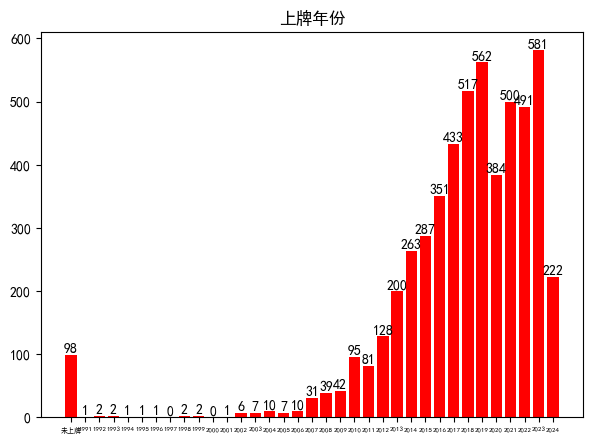

In [7]:
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

df = pd.read_csv("car_message.csv", encoding="utf-8")

df['上牌日期'] = df['上牌日期'].replace('未上牌', pd.NaT)
df['上牌日期'].fillna(pd.to_datetime('1990-01', format='%Y-%m'), inplace=True)
df['上牌日期'] = pd.to_datetime(df['上牌日期'], format='%Y-%m')

bins = pd.date_range(start=df['上牌日期'].min(), end='2025-01-01 00:00:00', freq='YS')
print("---------",df['上牌日期'].min())
labels = pd.date_range(start=df['上牌日期'].min(), periods=len(bins)-1,freq='YS')

df['日期区间'] = pd.cut(df['上牌日期'], bins=bins, labels=labels, right=False)
grouped = df.groupby('日期区间').size()
print(grouped)

#以下绘制柱状图
rcParams['font.sans-serif'] = ['SimHei']
x = ['未上牌','1991','1992','1993','1994','1995','1996','1997','1998','1999',
     '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
     '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021',
     '2022','2023','2024']
y = grouped.values
plt.figure(450)
plt.figure(figsize=(7,5))
plt.title('上牌年份')
plt.bar(x,y,color='#ff0000')
plt.xticks(fontsize=5)
for i, v in enumerate(y):
    plt.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=10)
plt.savefig('bar.png')
plt.show()


### （二）绘制箱线图

重点有二：如何处理空值；如何对数据进行分类

------------------- <class 'pandas.core.frame.DataFrame'>
Arr01 contains 1022 items
Arr02 contains 1337 items
Arr03 contains 915 items
Arr04 contains 801 items
Arr05 contains 750 items
Arr06 contains 506 items


<Figure size 2880x2160 with 0 Axes>

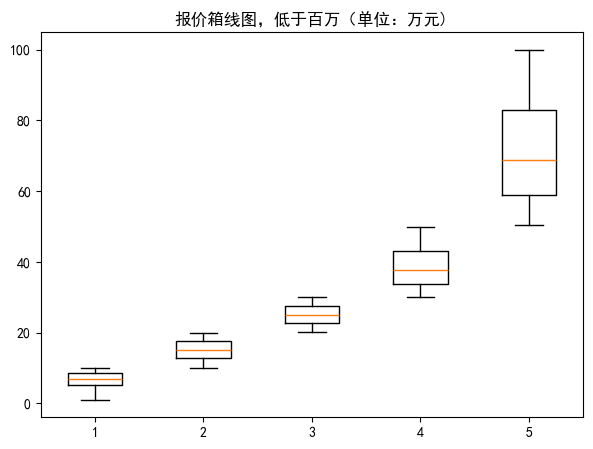

<Figure size 2880x2160 with 0 Axes>

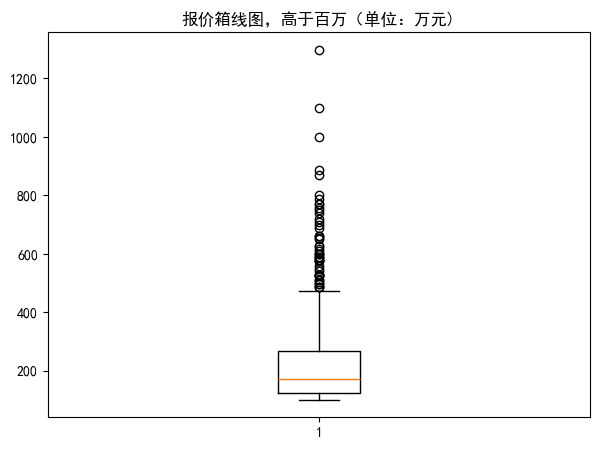

In [8]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math

df = pd.read_csv("car_message.csv",encoding="utf-8")
price_arr = df['报价'][:]
print("-------------------",type(df))
#print(df)
#print("-------------------",type(price_arr))
#print(price_arr)
#print(type(price_arr[4]))
Arr01 = []
Arr02 = []
Arr03 = []
Arr04 = []
Arr05 = []
Arr06 = []


# 将数据分到相应的区间
for i in price_arr:
    if math.isnan(i):
        continue  # 跳过nan值
    else:
        if 0<i and i<= 10:
            Arr01.append(i)
        elif 10<i and i<= 20:
            Arr02.append(i)
        elif 20<i and i<= 30:
            Arr03.append(i)
        elif 30<i and i<= 50:
            Arr04.append(i)
        elif 50<i and i<= 100:
            Arr05.append(i)
        else:
            Arr06.append(i)

print(f"Arr01 contains {len(Arr01)} items")
print(f"Arr02 contains {len(Arr02)} items")
print(f"Arr03 contains {len(Arr03)} items")
print(f"Arr04 contains {len(Arr04)} items")
print(f"Arr05 contains {len(Arr05)} items")
print(f"Arr06 contains {len(Arr06)} items")

rcParams['font.sans-serif'] = ['SimHei']
arr = [Arr01,Arr02,Arr03,Arr04,Arr05]
plt.figure(dpi=450)
plt.figure(figsize=(7,5))
plt.title('报价箱线图，低于百万（单位：万元)')
plt.boxplot(arr)
plt.savefig('boxplot_lower.png')
plt.show()

arr = [Arr06]
plt.figure(dpi=450)
plt.figure(figsize=(7,5))
plt.title('报价箱线图，高于百万（单位：万元)')
plt.boxplot(arr)
plt.savefig('boxplot_higher.png')
plt.show()
     

### （三）绘制圆饼图

C:\Users\86187\AppData\Local\Temp\ipykernel_17616\2430922798.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('报价区间').size()
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


报价区间
0-10      1022
10-20     1337
20-30      915
30-50      801
50-100     750
100万以上     506
dtype: int64
[1022 1337  915  801  750  506]


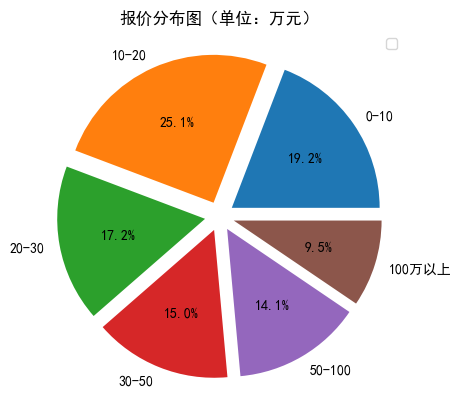

In [9]:
# -*- coding: utf-8 -*-
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams

df = pd.read_csv("car_message.csv",encoding="utf-8")
bins = [0,10,20,30,50,100,float("inf")]
labels = ['0-10','10-20','20-30','30-50','50-100','100万以上']
df['报价区间'] = pd.cut(df['报价'],bins=bins,labels=labels)
grouped = df.groupby('报价区间').size()
print(grouped)
arr = grouped.values
print(arr)
#已分理出数组元素，下面进行画图操作

rcParams['font.sans-serif'] = ['SimHei']
plt.figure(400)
plt.title('报价分布图（单位：万元）')
lables = ['0-10','10-20','20-30','30-50','50-100','100万以上']
plt.legend(loc='best') 
plt.pie(arr, labels=labels, autopct='%1.1f%%',explode=[0.1,0.1,0.1,0.1,0.1,0.1])
plt.savefig('pie.png')
plt.show()

### （四）特殊统计值

In [10]:
# -*- coding: utf-8 -*-
import pandas as pd
df = pd.read_csv('car_message.csv',encoding='utf-8')
df_price = df.loc[:,'报价']
df_price_min = df_price.min()
df_price_max = df_price.max()
df_price_mean = df_price.mean()
df_price_median = df_price.median()
print("最小报价",df_price_min)
print("最大报价",df_price_max)
print("报价均值",df_price_mean)
print("报价中位数",df_price_median)

selected_rows_min = df[df['报价'] == df_price_min]
Selected_rows_min = selected_rows_min.to_string(index=False,header=False)
print(f"最小报价对应的车型为：\n{Selected_rows_min}")

selected_rows_max = df[df['报价'] == df_price_max]
Selected_rows_max = selected_rows_max.to_string(index=False,header=False)
print(f"最高报价对应的车型为：\n{Selected_rows_max}")


最小报价 1.0
最大报价 1298.0
报价均值 47.394862127180645
报价中位数 23.58
最小报价对应的车型为：
明锐 2012款 1.6L 手动逸俊版 13.1 2012-09 1.0 14.87
最高报价对应的车型为：
幻影 2024款 长轴距版 系列II 0.01 未上牌 1298.0 1070.27


## 三、其他

提交作业时以文件夹压缩包的形式提交。代码的可移植性未经过检验。

Python解释器版本为Python 3.12.4('base')。来自anaconda3。

网站中用于数据可视化的.csv文件的创建日期为2024/7/9 13:50

如果出现“无法从源解析导入……{package_name}”报错，尝试如下语句。

In [ ]:
import subprocess

# 定义要执行的命令
command = 'pip install bs4'
#'re','pandas'

# 使用subprocess模块执行命令
try:
    # 执行命令，捕获输出和错误
    result = subprocess.run(command, shell=True, check=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
    
    # 输出命令执行结果
    print("命令执行成功:")
    print(result.stdout)
    
except subprocess.CalledProcessError as e:
    # 如果命令执行失败，输出错误信息
    print("命令执行失败:")
    print(e.stderr)